In [1]:
import numpy as np
import matplotlib.pyplot as plt
from jupyterthemes import jtplot
jtplot.style()

# K-Means Clustering

In [2]:
import scipy.io as sio
data_path = 'ex7data2.mat'
data = sio.loadmat(data_path)
print(data.keys())

dict_keys(['__header__', '__version__', '__globals__', 'X'])


(300, 2)


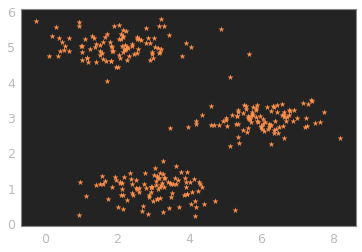

In [114]:
X = data['X']
K = 3 # 3 Centroids
initial_centroids = np.array([[3, 3],[6, 2],[8, 5]])
print(X.shape)
plt.grid(False)
plt.scatter(X[:,0], X[:,1], marker='*', c='y')
plt.show()

In [3]:
def find_closest_centroids(X, centroids):
    idx = []
    for i in range(X.shape[0]):
        idx.append(np.argmin(np.sum((X[i] - centroids)**2, axis=1)/X.shape[1]))
    return np.array(idx)

In [80]:
idx = find_closest_centroids(X, initial_centroids)
print("Closest centroids for the first 3 examples ", idx[:3])

Closest centroids for the first 3 examples  [0 2 1]


In [4]:
def compute_centroids(X, idx, K):
    centroids = np.zeros([K, X.shape[1]])
    for i in range(K):
        X_i = X[idx == i]
        centroids[i] = np.sum(X_i, axis=0)/X_i.shape[0]
    return centroids

In [102]:
centroids = compute_centroids(X, idx, K)
print("Centroids computed after initial finding of closest centroids\n", centroids)

Centroids computed after initial finding of closest centroids
 [[2.42830111 3.15792418]
 [5.81350331 2.63365645]
 [7.11938687 3.6166844 ]]


In [5]:
def run_kMeans(X, centroids, max_iters):
    centroids_history = [centroids]
    for i in range(max_iters):
        idx = find_closest_centroids(X, centroids)
        centroids = compute_centroids(X, idx, K)
        centroids_history.append(centroids)
    return idx, centroids, np.array(centroids_history)

In [156]:
max_iters = 10
initial_centroids = np.array([[3, 3], [6, 2], [8, 5]])

idx, res_centroids, history = run_kMeans(X, initial_centroids, max_iters)

In [164]:
history[:, 0][:,0]

array([[3.        , 3.        ],
       [2.42830111, 3.15792418],
       [2.31325526, 3.22830617],
       [2.19692479, 3.42136707],
       [1.98241171, 4.0250785 ],
       [1.95399466, 5.02557006],
       [1.95399466, 5.02557006],
       [1.95399466, 5.02557006],
       [1.95399466, 5.02557006],
       [1.95399466, 5.02557006],
       [1.95399466, 5.02557006]])

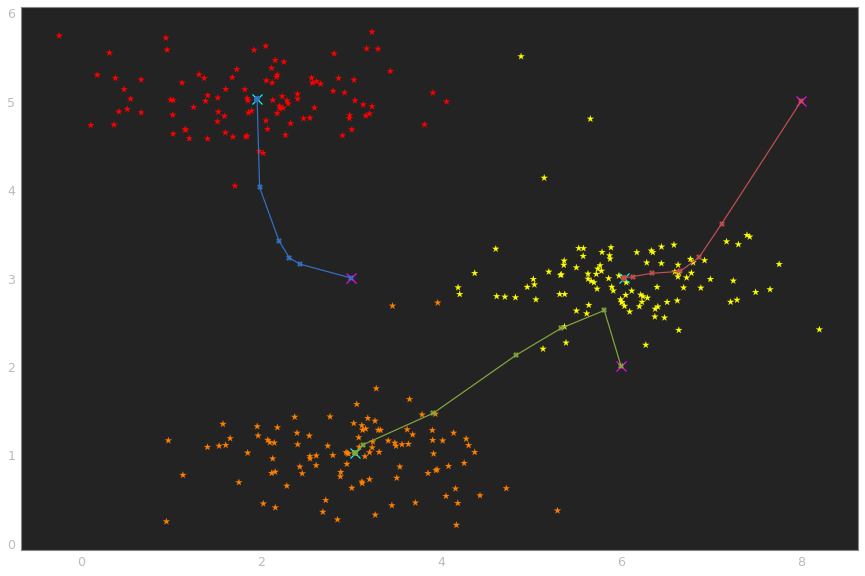

In [175]:
plt.figure(figsize=(15,10))
plt.grid(False)
plt.scatter(X[:,0], X[:,1], marker='*', c=idx, s=50, cmap='autumn')
plt.scatter(res_centroids[:,0], res_centroids[:,1], marker='x', c='cyan' ,s=100)
plt.scatter(initial_centroids[:,0], initial_centroids[:,1], marker='x', c='magenta' ,s=100)
for i in range(K):
    plt.plot(history[:, i][:,0], history[:, i][:,1], marker='X')
plt.show()

# Image compression

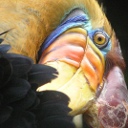

In [41]:
import PIL
from PIL import Image
im = Image.open("bird_small.png")
display(im) 

In [42]:
im_arr = np.array(im)
im_arr = im_arr/255
X = im_arr.reshape(-1, 3)
print(X.shape)

(16384, 3)


In [43]:
X[np.random.choice(X.shape[0], 3, replace=False),:]

array([[0.11764706, 0.12941176, 0.1372549 ],
       [0.97254902, 0.94901961, 0.61176471],
       [0.90196078, 0.60392157, 0.35686275]])

In [44]:
def kMeans_init_centroids(X, K):
    return X[np.random.choice(X.shape[0], K, replace=False), :]

In [45]:
K = 16
max_iters = 10
initial_centroids = kMeans_init_centroids(X, K)

In [46]:
idx, res_centroids, history = run_kMeans(X, initial_centroids, max_iters)

In [47]:
X_recovered = res_centroids[idx, :]
X_recovered = X_recovered * 255
X_recovered = X_recovered.reshape(im_arr.shape[0], im_arr.shape[1], 3)
im_recovered = Image.fromarray(np.uint8(X_recovered)) 

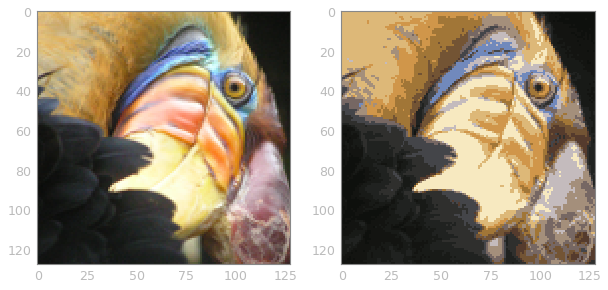

In [48]:
plt.rcParams['axes.grid'] = False
fig, axes = plt.subplots(1, 2, figsize=(10,10))
axes[0].imshow(im) 
axes[1].imshow(im_recovered) 